# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$dQ = \frac{1}{l} d[(y - Xw)^T](y - Xw) + \frac{1}{l} (y - Xw)^T d[y - Xw] = -\frac{1}{l} (Xdw)^T(y - Xw) - \frac{1}{l}(y - Xw)^T(Xdw) = -\frac{2}{l}(y - Xw)^T(Xdw)$$
$$\nabla Q(w) = 0 \Rightarrow X^T(y - Xw) = 0 \Rightarrow w = (X^T X)^{-1}X^T y$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### done


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### done


### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### done


### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### done


### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

### done

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

### done

## Задание 3. Проверка кода (0 баллов)

In [1]:
%reload_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/29933/run-report/69553710/


* **StochasticDescent**: https://contest.yandex.ru/contest/29933/run-report/69553716/


* **MomentumDescent**: https://contest.yandex.ru/contest/29933/run-report/69553725/


* **Adam**: https://contest.yandex.ru/contest/29933/run-report/69554109/


* **LinearRegression**: https://contest.yandex.ru/contest/29933/run-report/69554229/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression
from linear_regression import LinearRegressionLogCosh

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()


,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
print('max price:', data.price.max())
print('min price:', data.price.min())
print('mean price:', data.price.mean())

max price: 99999
min price: 1
mean price: 6887.741892284092


Цена в 1 единицу, как и цена в 99999 единиц, кажется аномальной на фоне средней в примерно 7000. На основании этого удалим из данных по проценту самых наименьших и наибольших данных.

In [10]:
data = data.loc[(data.price > data.price.quantile(0.01)) & (data.price < data.price.quantile(0.99))]

<AxesSubplot:>

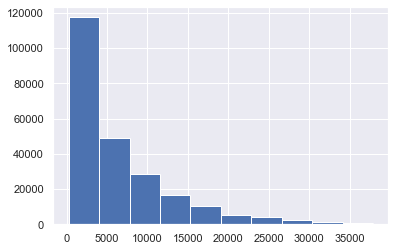

In [11]:
data.price.hist()

Так как данные обладают явной ассиметрией, можно применить к ним логарифмирование.

<AxesSubplot:>

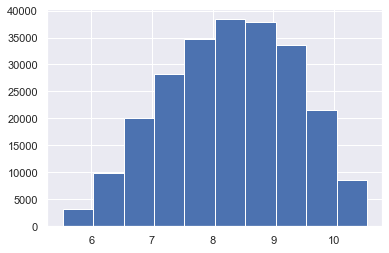

In [12]:
data['log_price'] = np.log1p(data.price)
data.log_price.hist()

Посмотрим на распределение средней цены в зависимости от бренда.

<AxesSubplot:xlabel='brand'>

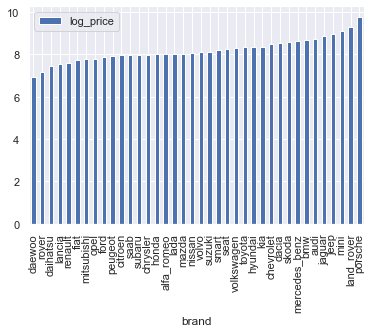

In [13]:
pd.DataFrame(data.groupby(by='brand', as_index=False)['log_price'].mean()).sort_values(by='log_price').plot.bar('brand', 'log_price')

<AxesSubplot:xlabel='model'>

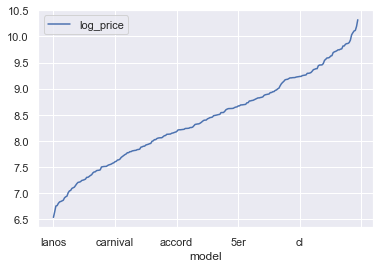

In [14]:
pd.DataFrame(data.groupby(by='model', as_index=False)['log_price'].mean()).sort_values(by='log_price').plot('model', 'log_price')

Явно присутствует зависимость, так что данные признаки полезные.

Посмотрим аналогичным образом на остальные категориальные признаки.

<AxesSubplot:xlabel='vehicleType'>

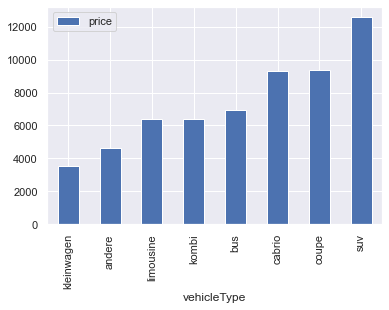

In [15]:
pd.DataFrame(data.groupby(by='vehicleType', as_index=False)['price'].mean()).sort_values(by='price').plot.bar('vehicleType', 'price')

<AxesSubplot:xlabel='gearbox'>

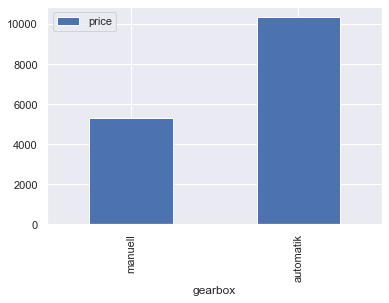

In [16]:
pd.DataFrame(data.groupby(by='gearbox', as_index=False)['price'].mean()).sort_values(by='price').plot.bar('gearbox', 'price')

<AxesSubplot:xlabel='fuelType'>

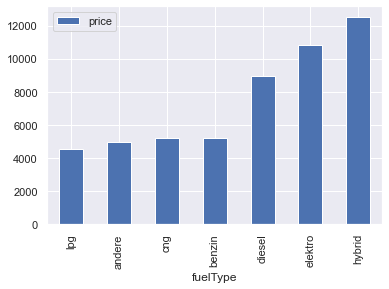

In [17]:
pd.DataFrame(data.groupby(by='fuelType', as_index=False)['price'].mean()).sort_values(by='price').plot.bar('fuelType', 'price')

<AxesSubplot:xlabel='notRepairedDamage'>

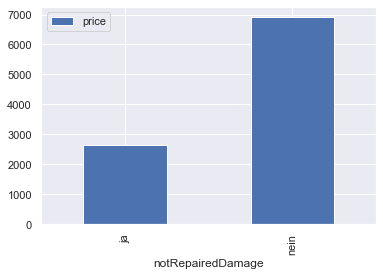

In [18]:
pd.DataFrame(data.groupby(by='notRepairedDamage', as_index=False)['price'].mean()).sort_values(by='price').plot.bar('notRepairedDamage', 'price')

In [19]:
data.fuelType.unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

Собственно, все категориальные признаки полезны. Единственное, что можно сделать, так это объединить машины с типами топлива lpg, andere, cng, benzin в один тип other, так как судя по графику, все они находятся примерно в одной ценовой категории.

In [20]:
replace_dict = {'benzin': 'other', 'lpg': 'other', 'andere': 'other', 'cng': 'other'}
data.fuelType = data.fuelType.replace(replace_dict)

Посмотрим теперь на количественные переменные.

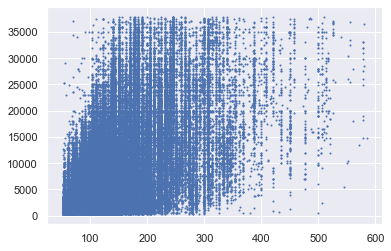

In [21]:
plt.scatter(data.powerPS, data.price, s=1)

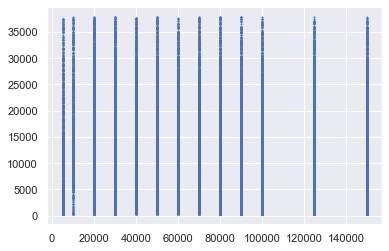

In [22]:
plt.scatter(data.kilometer, data.price, s=1)

<AxesSubplot:xlabel='kilometer'>

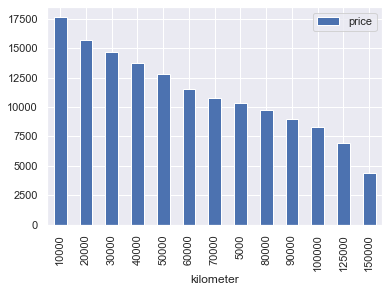

In [23]:
pd.DataFrame(data.groupby(by='kilometer', as_index=False)['price'].mean()).sort_values(by='price', ascending=False).plot.bar('kilometer', 'price')

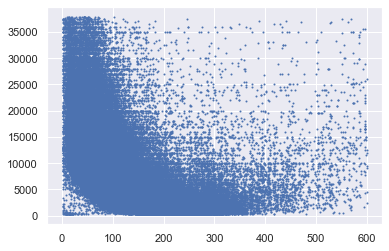

In [24]:
plt.scatter(data.autoAgeMonths, data.price, s=1)

Как и ожидалось, количество лошадинных сил положительно коррелирует с ценой авто, в то время как пробег и возраст - отрицательно.

In [25]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [26]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
], sparse_threshold=0)

x = column_transformer.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_aux, y_train, y_aux = train_test_split(x, y, test_size=0.2, random_state=1)
x_test, x_valid, y_test, y_valid = train_test_split(x_aux, y_aux, test_size=0.5, random_state=1)

In [29]:
y_train, y_test, y_valid = np.array(y_train), np.array(y_test), np.array(y_valid)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [205]:
lambdas = {'full': [np.inf, 0], 'stochastic': [np.inf, 0], 'momentum': [np.inf, 0], 'adam': [np.inf, 0]}

for descent in ['full', 'stochastic', 'momentum', 'adam']:
    for lam in np.logspace(-2, 2, 20):
        model = LinearRegression({'descent_name': descent, 'kwargs': {'lambda_': lam, 'dimension': 306}}) 
        model.fit(x_train, y_train)

        aux = model.calc_loss(x_valid, y_valid)
        if aux < lambdas[descent][0]:
            lambdas[descent][0] = aux
            lambdas[descent][1] = lam


c:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\descents.py:75: RuntimeWarning: overflow encountered in square
  return ((y - self.predict(x)) ** 2).mean()
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\linear_regression.py:33: RuntimeWarning: overflow encountered in square
  if np.sum(difference ** 2) < self.tolerance or np.isnan(difference).any():
c:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\descents.py:86: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(x, self.w)
c:\Users\Vlad\Desktop\proga\машинно

In [30]:
lambdas = {'full': [0.3311135894602297, 1.2742749857031335],
 'stochastic': [0.3393290454923561, 0.4832930238571752],
 'momentum': [0.25621340206991106, 1.2742749857031335],
 'adam': [0.24073338867168062, 3.359818286283781]}

In [31]:
from sklearn.metrics import r2_score

grad_descents = {i: {'lambda': lambdas[i][1]} for i in lambdas.keys()}

for key, value in grad_descents.items():
    value['model'] = LinearRegression({'descent_name': key, 'kwargs': {'lambda_': value['lambda'], 'dimension': 306}}) 
    value['model'].fit(x_train, y_train)

    value['train_error'] = value['model'].loss_history[-1]
    value['test_error'] = value['model'].calc_loss(x_test, y_test)
    value['train_r^2'] = r2_score(value['model'].predict(x_train), y_train)
    value['tast_r^2'] = r2_score(value['model'].predict(x_test), y_test)

    value['num_of_iters'] = value['model'].descent.lr.iteration


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

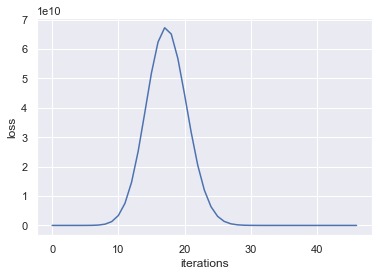

In [32]:
plt.plot(np.arange(grad_descents['full']['num_of_iters'] + 1), grad_descents['full']['model'].loss_history)

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

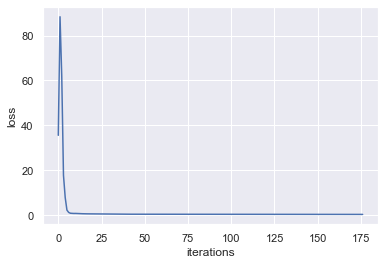

In [33]:
plt.plot(np.arange(grad_descents['stochastic']['num_of_iters'] + 1), grad_descents['stochastic']['model'].loss_history)

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

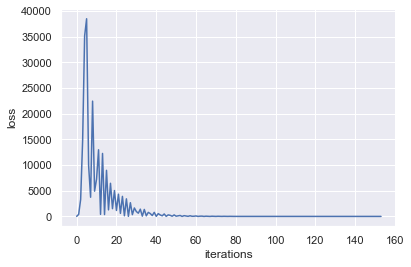

In [34]:
plt.plot(np.arange(grad_descents['momentum']['num_of_iters'] + 1), grad_descents['momentum']['model'].loss_history)

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

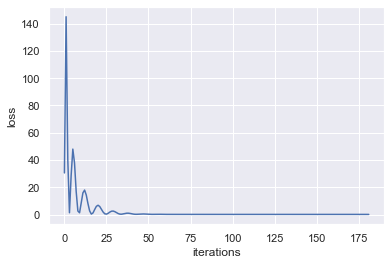

In [35]:
plt.plot(np.arange(grad_descents['adam']['num_of_iters'] + 1), grad_descents['adam']['model'].loss_history)

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

In [36]:
for key, value in grad_descents.items():
    print(key + ': ', value, '\n')

full:  {'lambda': 1.2742749857031335, 'model': <linear_regression.LinearRegression object at 0x000001AFA22ECFD0>, 'train_error': 0.31719091841977176, 'test_error': 0.3148326789376858, 'train_r^2': 0.6393108778127266, 'tast_r^2': 0.6381861488759518, 'num_of_iters': 46} 

stochastic:  {'lambda': 0.4832930238571752, 'model': <linear_regression.LinearRegression object at 0x000001AFA29F57C0>, 'train_error': 0.34027628717590375, 'test_error': 0.3378565324657701, 'train_r^2': 0.593301428867185, 'tast_r^2': 0.5957271677631795, 'num_of_iters': 176} 

momentum:  {'lambda': 1.2742749857031335, 'model': <linear_regression.LinearRegression object at 0x000001AFA29F5820>, 'train_error': 0.2549641416254084, 'test_error': 0.252008374314917, 'train_r^2': 0.7041796365619295, 'tast_r^2': 0.7071427257534368, 'num_of_iters': 153} 

adam:  {'lambda': 3.359818286283781, 'model': <linear_regression.LinearRegression object at 0x000001AFA2A00730>, 'train_error': 0.23874305217730576, 'test_error': 0.2356486197333

По мимнимазации ошибки лучше всего проявил себя adam-метод. Меньше всего шагов для сходимости потребовалось полному градиентному спуску. Самый большой коэффициент детерминации также имеет метод adam. Однако в целом, все методы так или иначе справились с задачей.

На графиках присутсвуют высокие пики. Это, скорее всего, связанно с большим начальным шагом. 

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [75]:
import time 

batch_sizes = np.arange(5, 500, 50)
steps = []
times = []

for i in batch_sizes:
    num_steps = 0
    time_ = 0
    for _ in range(10):
        model = LinearRegression({'descent_name': 'stochastic', 'kwargs': {'lambda_': grad_descents['stochastic']['lambda'], 'dimension': 306, 'batch_size': i}}) 
        start_time = time.time()
        model.fit(x_train, y_train)
        time_ += time.time() - start_time
        num_steps += model.descent.lr.iteration
    steps.append(num_steps / 10)
    times.append(time_ / 10)

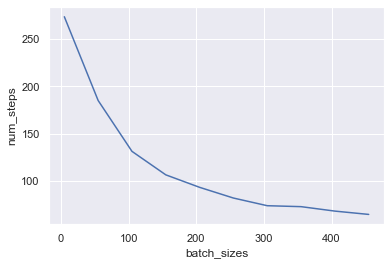

In [76]:
plt.plot(batch_sizes, steps)

plt.xlabel('batch_sizes')
plt.ylabel('num_steps')

plt.show()

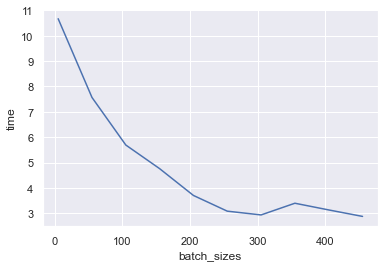

In [77]:
plt.plot(batch_sizes, times)

plt.xlabel('batch_sizes')
plt.ylabel('time')

plt.show()

Как и следовало ожидать, чем больше размер батча, тем быстрее происходит сходимость. Так же, при увеличении размера батча падает время, необходимое для просчета градиентного спуска. Это говорит о том, что количество шагов уменьшается быстрее, чем увеличивается размер батча.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/69633588/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

In [45]:
lambda_and_mu = {i: {'error': np.inf, 'lambda': 0, 'mu': 0} for i in ['full', 'stochastic', 'momentum', 'adam']}

for descent in lambda_and_mu.keys(): 
    for lambda_ in np.logspace(-2, 2, 5):
        for mu in np.logspace(-2, 2, 5):
            model = LinearRegression({'descent_name': descent, 'regularized': True, 'kwargs': {'lambda_': lambda_, 'mu': mu, 'dimension': 306}}) 
            model.fit(x_train, y_train)

            aux = model.calc_loss(x_valid, y_valid)
            if aux < lambda_and_mu[descent]['error']:
                lambda_and_mu[descent]['error'] = aux
                lambda_and_mu[descent]['lambda_'] = lambda_
                lambda_and_mu[descent]['mu'] = mu

        

c:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\descents.py:75: RuntimeWarning: overflow encountered in square
  return ((y - self.predict(x)) ** 2).mean()
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\linear_regression.py:33: RuntimeWarning: overflow encountered in square
  if np.sum(difference ** 2) < self.tolerance or np.isnan(difference).any():
c:\Users\Vlad\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\descents.py:111: RuntimeWarning: overflow encountered in matmul
  return (- 2 / l) * np.matmul(np.transpose(y - np.matmul(x, self.w))

In [37]:
lambda_and_mu = {'full': {'error': 0.304869017686043, 'mu': 0.01, 'lambda_': 1.0},
 'stochastic': {'error': 0.35132708782010585,
  'mu': 0.01,
  'lambda_': 1.0},
 'momentum': {'error': 0.2636557328886449,
  'mu': 0.01,
  'lambda_': 1.0},
 'adam': {'error': 0.2661986022149553,
  'mu': 0.01,
  'lambda_': 10.0}}

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

In [38]:
from sklearn.metrics import r2_score

for key, value in lambda_and_mu.items():
    value['model'] = LinearRegression({'descent_name': key, 'regularized': True, 'kwargs': {'lambda_': value['lambda_'], 'mu': value['mu'], 'dimension': 306}}) 
    value['model'].fit(x_train, y_train)


    value['test_error'] = value['model'].calc_loss(x_test, y_test)
    value['train_r^2'] = r2_score(value['model'].predict(x_train), y_train)
    value['tast_r^2'] = r2_score(value['model'].predict(x_test), y_test)

    value['num_of_iters'] = value['model'].descent.lr.iteration


In [39]:
for key, value in grad_descents.items():
    print(key + ': ', value, '\n')

full:  {'lambda': 1.2742749857031335, 'model': <linear_regression.LinearRegression object at 0x000001AFA22ECFD0>, 'train_error': 0.31719091841977176, 'test_error': 0.3148326789376858, 'train_r^2': 0.6393108778127266, 'tast_r^2': 0.6381861488759518, 'num_of_iters': 46} 

stochastic:  {'lambda': 0.4832930238571752, 'model': <linear_regression.LinearRegression object at 0x000001AFA29F57C0>, 'train_error': 0.34027628717590375, 'test_error': 0.3378565324657701, 'train_r^2': 0.593301428867185, 'tast_r^2': 0.5957271677631795, 'num_of_iters': 176} 

momentum:  {'lambda': 1.2742749857031335, 'model': <linear_regression.LinearRegression object at 0x000001AFA29F5820>, 'train_error': 0.2549641416254084, 'test_error': 0.252008374314917, 'train_r^2': 0.7041796365619295, 'tast_r^2': 0.7071427257534368, 'num_of_iters': 153} 

adam:  {'lambda': 3.359818286283781, 'model': <linear_regression.LinearRegression object at 0x000001AFA2A00730>, 'train_error': 0.23874305217730576, 'test_error': 0.2356486197333

In [40]:
for key, value in lambda_and_mu.items():
    print(key + ': ', value, '\n')

full:  {'error': 0.304869017686043, 'mu': 0.01, 'lambda_': 1.0, 'model': <linear_regression.LinearRegression object at 0x000001AFA3C22970>, 'test_error': 0.2890269225377992, 'train_r^2': 0.66317597528832, 'tast_r^2': 0.6650975675464394, 'num_of_iters': 103} 

stochastic:  {'error': 0.35132708782010585, 'mu': 0.01, 'lambda_': 1.0, 'model': <linear_regression.LinearRegression object at 0x000001AFA2C5C1C0>, 'test_error': 0.4144029134987678, 'train_r^2': 0.5640731953545228, 'tast_r^2': 0.5634253298135098, 'num_of_iters': 300} 

momentum:  {'error': 0.2636557328886449, 'mu': 0.01, 'lambda_': 1.0, 'model': <linear_regression.LinearRegression object at 0x000001AFA2C4ED30>, 'test_error': 0.2600899675299492, 'train_r^2': 0.6921572950785779, 'tast_r^2': 0.6940562119672729, 'num_of_iters': 300} 

adam:  {'error': 0.2661986022149553, 'mu': 0.01, 'lambda_': 10.0, 'model': <linear_regression.LinearRegression object at 0x000001AFA2D43FA0>, 'test_error': 0.2622781736971108, 'train_r^2': 0.689125365621

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

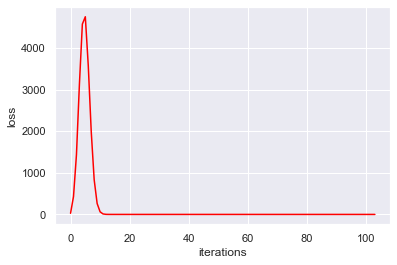

In [41]:
#plt.plot(np.arange(grad_descents['full']['num_of_iters'] + 1), grad_descents['full']['model'].loss_history, c='blue')
plt.plot(np.arange(lambda_and_mu['full']['num_of_iters'] + 1), lambda_and_mu['full']['model'].loss_history, c='red')

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

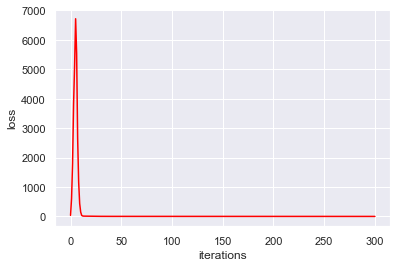

In [42]:
#plt.plot(np.arange(grad_descents['stochastic']['num_of_iters'] + 1), grad_descents['stochastic']['model'].loss_history, c='blue')
plt.plot(np.arange(lambda_and_mu['stochastic']['num_of_iters'] + 1), lambda_and_mu['stochastic']['model'].loss_history, c='red')

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

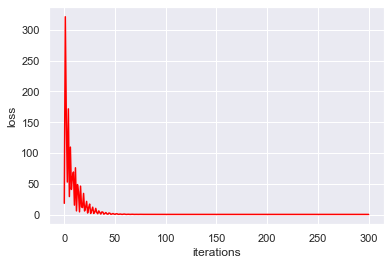

In [43]:
#plt.plot(np.arange(grad_descents['momentum']['num_of_iters'] + 1), grad_descents['momentum']['model'].loss_history, c='blue')
plt.plot(np.arange(lambda_and_mu['momentum']['num_of_iters'] + 1), lambda_and_mu['momentum']['model'].loss_history, c='red')

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

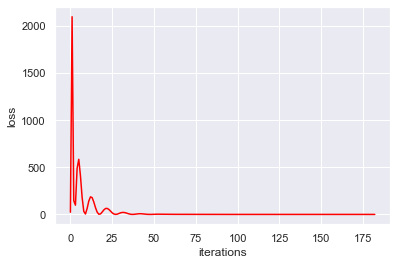

In [44]:
#plt.plot(np.arange(grad_descents['adam']['num_of_iters'] + 1), grad_descents['adam']['model'].loss_history, c='blue')
plt.plot(np.arange(lambda_and_mu['adam']['num_of_iters'] + 1), lambda_and_mu['adam']['model'].loss_history, c='red')

plt.xlabel('iterations')
plt.ylabel('loss')

plt.show()

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Результат неоднозначный, где-то регуляризация помогла, а где-то нет. Возможно следует попробовать запустить более точные вычисления (перебрать больше значений по lambda и mu)

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$\frac{1}{n}tanh(Xw - y)^TX$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [46]:
lambdas = {'full': [np.inf, 0], 'stochastic': [np.inf, 0], 'momentum': [np.inf, 0], 'adam': [np.inf, 0]}

for descent in ['full', 'stochastic', 'momentum', 'adam']:
    for lam in np.logspace(-2, 2, 20):
        model = LinearRegressionLogCosh({'descent_name': descent, 'kwargs': {'lambda_': lam, 'dimension': 306}}) 
        model.fit(x_train, y_train)

        aux = model.calc_loss(x_valid, y_valid)
        if aux < lambdas[descent][0]:
            lambdas[descent][0] = aux
            lambdas[descent][1] = lam


c:\Users\Vlad\Desktop\proga\машинное обучение ВШЭ\часть 1\дз\дз3\descents.py:308: RuntimeWarning: overflow encountered in cosh
  return (np.log(np.cosh(y - self.predict(x)))).mean()


In [49]:
from sklearn.metrics import r2_score

grad_descentsLogCosh = {i: {'lambda': lambdas[i][1]} for i in lambdas.keys()}

for key, value in grad_descentsLogCosh.items():
    value['model'] = LinearRegressionLogCosh({'descent_name': key, 'kwargs': {'lambda_': value['lambda'], 'dimension': 306}}) 
    value['model'].fit(x_train, y_train)

    value['train_error'] = value['model'].loss_history[-1]
    value['test_error'] = value['model'].calc_loss(x_test, y_test)
    value['train_r^2'] = r2_score(value['model'].predict(x_train), y_train)
    value['tast_r^2'] = r2_score(value['model'].predict(x_test), y_test)

    value['num_of_iters'] = value['model'].descent.lr.iteration

for key, value in grad_descentsLogCosh.items():
    print(key + ': ', value, '\n')


full:  {'lambda': 8.858667904100823, 'model': <linear_regression.LinearRegressionLogCosh object at 0x000001AFA2C62250>, 'train_error': 0.11398257602689442, 'test_error': 0.11286792814508985, 'train_r^2': 0.6885977730686729, 'tast_r^2': 0.6938614154642403, 'num_of_iters': 198} 

stochastic:  {'lambda': 0.016237767391887217, 'model': <linear_regression.LinearRegressionLogCosh object at 0x000001AFA2C62BB0>, 'train_error': 4.062607731481993, 'test_error': 4.065004254930283, 'train_r^2': -14.535956291236403, 'tast_r^2': -14.437511450393394, 'num_of_iters': 8} 

momentum:  {'lambda': 8.858667904100823, 'model': <linear_regression.LinearRegressionLogCosh object at 0x000001AFA2D58700>, 'train_error': 0.10040207694723631, 'test_error': 0.09966060893319968, 'train_r^2': 0.7204666835670399, 'tast_r^2': 0.724117885979269, 'num_of_iters': 300} 

adam:  {'lambda': 8.858667904100823, 'model': <linear_regression.LinearRegressionLogCosh object at 0x000001AFA2D58E80>, 'train_error': 0.09513737380569605,

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

`### ваша прогулка тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [80]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [81]:
# YOUR CODE: